In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import  ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import catboost as ctb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  precision_score
from sklearn.utils import resample

In [2]:
###########################################
############## Json to csv #########
###########################################


filename ='C:/Users/Adarsh/Downloads/customersdata.json'

with open(filename,'r')  as inputFile:      input = json.loads("[" + 
        inputFile.read().replace("}\n{", "},\n{") + 
    "]")

#type(input)

#print(input["orders"])
#a=0

df = pd.DataFrame( columns = ['customerDevice','customerEmail','customerIPAddress','customerPhone','customerBillingAddress',
                              'fraudulent','orderAmount','orderId','orderShippingAddress','orderState']) 

#input.pop(167)
a=0 
for i in input: 
   # print(type(i))
   # print(i["fraudulent"])
    
    for j in (i["orders"]):
        #print(type(j))
       # print(j["orderId"])
        df.loc[a] = (i["customer"]["customerDevice"],i["customer"]["customerEmail"],i["customer"]["customerIPAddress"],i["customer"]["customerPhone"],i["customer"]["customerBillingAddress"],i["fraudulent"],j["orderAmount"],j["orderId"],j["orderShippingAddress"],j["orderState"])
        a=a+1

a=0 
df_t = pd.DataFrame( columns = ['orderId','paymentMethodId','transactionAmount','transactionFailed','transactionId'])
    
for i in input: 
      for j in (i["transactions"]):
       df_t.loc[a]=(j["orderId"],j["paymentMethodId"],j["transactionAmount"],j["transactionFailed"],j["transactionId"])
       a=a+1

df_p = pd.DataFrame( columns = ['paymentMethodId','paymentMethodIssuer','paymentMethodProvider','paymentMethodRegistrationFailure','paymentMethodType'])
a=0 

for i in input: 
	for j in (i["paymentMethods"]):
		df_p.loc[a]=(j["paymentMethodId"],j["paymentMethodIssuer"],j["paymentMethodProvider"],j["paymentMethodRegistrationFailure"],j["paymentMethodType"])
		a=a+1

df_transaction = df.merge(df_t, how='left')
df_final = df_transaction.merge(df_p, how='left')

### Convert DF to csv file
#data=df_final.to_csv(r'E:\ADM\Excelr solutions\Warranty  claims project\customer.csv')


In [3]:
df_final

,customerDevice,customerEmail,customerIPAddress,customerPhone,customerBillingAddress,fraudulent,orderAmount,orderId,orderShippingAddress,orderState,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,"5493 Jones Islands\nBrownside, CA 51896",False,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card
1,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,"5493 Jones Islands\nBrownside, CA 51896",False,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card
2,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin
3,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin
4,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,7yen1m1q8,25,True,7yilsi1o,Vertex Bancorp,VISA 13 digit,False,card
619,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,3zmkegkb8,25,True,wmh52bns,Bastion Banks,JCB 15 digit,False,paypal
620,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,7yen1m1q8,25,False,c82k5bcv,Vertex Bancorp,VISA 13 digit,False,card
621,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,19,p0gdbf,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,3zmkegkb8,19,False,xdw33hfp,Bastion Banks,JCB 15 digit,False,paypal


In [5]:
df_final.shape

(623, 18)

In [6]:
#Importing csv file which I ssaved on pc

cust=pd.read_csv("E:/ADM/customer.csv")
cust=cust.drop(["Unnamed: 0"],axis=1)

In [7]:
cust

,customerDevice,customerEmail,customerIPAddress,customerPhone,customerBillingAddress,fraudulent,orderAmount,orderId,orderShippingAddress,orderState,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,"5493 Jones Islands\nBrownside, CA 51896",False,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card
1,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,"5493 Jones Islands\nBrownside, CA 51896",False,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card
2,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin
3,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin
4,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,7yen1m1q8,25,True,7yilsi1o,Vertex Bancorp,VISA 13 digit,False,card
619,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,3zmkegkb8,25,True,wmh52bns,Bastion Banks,JCB 15 digit,False,paypal
620,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,25,1bubxa,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,7yen1m1q8,25,False,c82k5bcv,Vertex Bancorp,VISA 13 digit,False,card
621,lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",False,19,p0gdbf,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",fulfilled,3zmkegkb8,19,False,xdw33hfp,Bastion Banks,JCB 15 digit,False,paypal


In [8]:
cust.shape

(623, 18)

In [9]:
#Droping the variables which is not important for output variable.
cust=cust.drop(["customerDevice","customerEmail","customerIPAddress","customerPhone","customerBillingAddress","orderId","orderShippingAddress","paymentMethodId","transactionId"],axis=1)
cust.columns


Index(['fraudulent', 'orderAmount', 'orderState', 'transactionAmount',
       'transactionFailed', 'paymentMethodIssuer', 'paymentMethodProvider',
       'paymentMethodRegistrationFailure', 'paymentMethodType'],
      dtype='object')

In [10]:
cust.shape

(623, 9)

In [11]:
#converting into binary
lb=LabelEncoder()
cust["fraudulent"]=lb.fit_transform(cust["fraudulent"])
cust["orderState"]=lb.fit_transform(cust["orderState"])
cust["transactionFailed"]=lb.fit_transform(cust["transactionFailed"])
cust["paymentMethodIssuer"]=lb.fit_transform(cust["paymentMethodIssuer"])
cust["paymentMethodProvider"]=lb.fit_transform(cust["paymentMethodProvider"])
cust["paymentMethodRegistrationFailure"]=lb.fit_transform(cust["paymentMethodRegistrationFailure"])
cust["paymentMethodType"]=lb.fit_transform(cust["paymentMethodType"])

In [12]:
cust.head(20)

,fraudulent,orderAmount,orderState,transactionAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,0,18,2,18,0,3,4,1,2
1,0,26,1,26,0,3,4,1,2
2,1,45,1,45,0,1,0,0,1
3,1,23,1,23,0,1,0,0,1
4,1,43,1,43,1,9,8,1,1
5,0,33,0,33,0,1,4,0,2
6,0,24,1,24,1,1,4,0,2
7,0,24,1,24,0,1,4,0,2
8,0,25,1,25,1,7,2,0,2
9,0,25,1,25,0,1,4,0,2


In [13]:
########################################################
########################### EDA ########################
########################################################


#Identify duplicates records in the data
dupes=cust.duplicated()
sum(dupes)


37

In [14]:
#Removing Duplicates
cust1=cust.drop_duplicates()

In [15]:

cust1.isnull().sum()

fraudulent                          0
orderAmount                         0
orderState                          0
transactionAmount                   0
transactionFailed                   0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
dtype: int64

In [16]:
cust1['fraudulent'].unique()

array([0, 1], dtype=int64)

In [17]:
cust1.columns

Index(['fraudulent', 'orderAmount', 'orderState', 'transactionAmount',
       'transactionFailed', 'paymentMethodIssuer', 'paymentMethodProvider',
       'paymentMethodRegistrationFailure', 'paymentMethodType'],
      dtype='object')

In [18]:
describe= cust1.describe()

In [19]:
describe

,fraudulent,orderAmount,orderState,transactionAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.421502,34.892491,0.957338,34.892491,0.233788,5.865188,4.892491,0.133106,1.841297
std,0.494221,20.620305,0.404955,20.620305,0.423601,3.506855,2.753778,0.339979,0.677149
min,0.000000,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,1.000000,21.000000,0.000000,3.000000,3.000000,0.000000,2.000000
50%,0.000000,34.000000,1.000000,34.000000,0.000000,6.000000,5.000000,0.000000,2.000000
75%,1.000000,45.750000,1.000000,45.750000,0.000000,8.000000,8.000000,0.000000,2.000000
max,1.000000,353.000000,2.000000,353.000000,1.000000,18.000000,9.000000,1.000000,3.000000


In [20]:
cust1.median()

fraudulent                           0.0
orderAmount                         34.0
orderState                           1.0
transactionAmount                   34.0
transactionFailed                    0.0
paymentMethodIssuer                  6.0
paymentMethodProvider                5.0
paymentMethodRegistrationFailure     0.0
paymentMethodType                    2.0
dtype: float64

In [21]:
cust1.var()

fraudulent                            0.244255
orderAmount                         425.196969
orderState                            0.163989
transactionAmount                   425.196969
transactionFailed                     0.179438
paymentMethodIssuer                  12.298034
paymentMethodProvider                 7.583294
paymentMethodRegistrationFailure      0.115586
paymentMethodType                     0.458531
dtype: float64

In [22]:
max(cust1.orderAmount)-min(cust1.orderAmount)#range

343

In [23]:
cust1.skew()

fraudulent                          0.318752
orderAmount                         6.429009
orderState                         -0.327417
transactionAmount                   6.429009
transactionFailed                   1.261203
paymentMethodIssuer                 0.657193
paymentMethodProvider              -0.137455
paymentMethodRegistrationFailure    2.165724
paymentMethodType                  -1.353150
dtype: float64

In [24]:
#Finding outliers with index
def detect_outliers(x):
   q1 = np.percentile(x,25)
   q3 = np.percentile(x,75)
   iqr = q3 - q1
   lower = q1-(1.5*iqr)
   upper = q3+(1.5*iqr)
   outlier_indices = list(x.index[(x<lower) | (x>upper)])
   outlier_value = list(x[outlier_indices])
   
   return outlier_indices, outlier_value
indics, values =  detect_outliers(cust1["orderAmount"])
print(indics)
print(values)

[189]
[353]


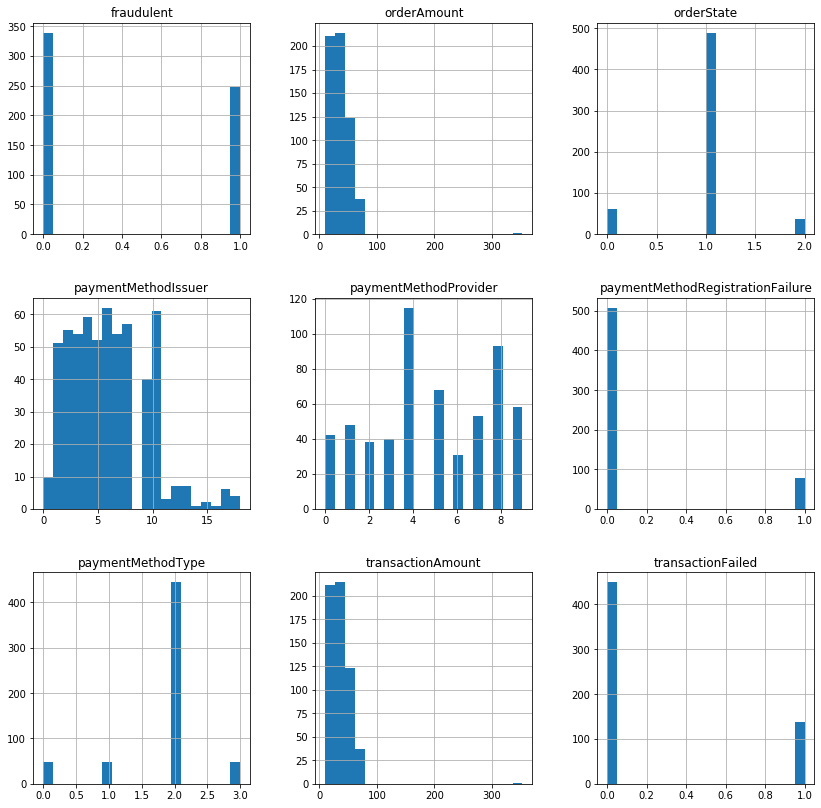

In [25]:
#histograms for each variable in df
hist =cust1.hist(bins=20,figsize =(14,14))

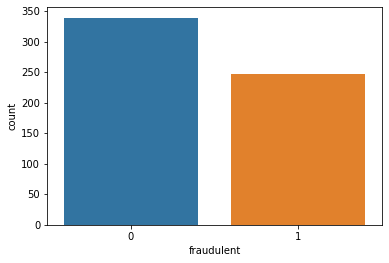

In [26]:
sns.countplot(data = cust1, x = 'fraudulent')

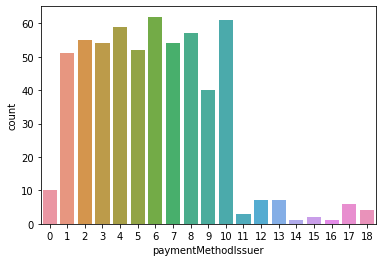

In [27]:
sns.countplot(data = cust1, x = 'paymentMethodIssuer')

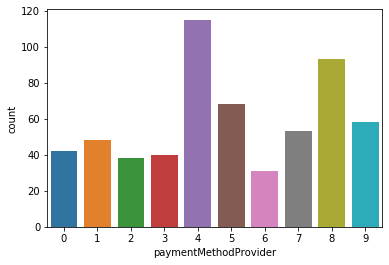

In [28]:
sns.countplot(data = cust1, x = 'paymentMethodProvider')

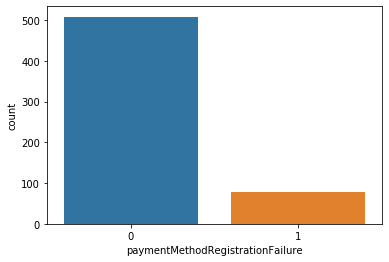

In [29]:
sns.countplot(data = cust1, x = 'paymentMethodRegistrationFailure')

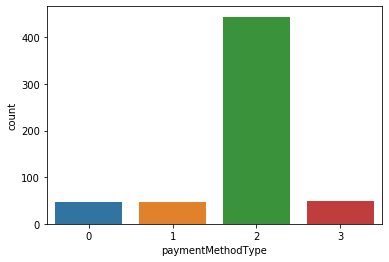

In [30]:
sns.countplot(data = cust1, x = 'paymentMethodType')

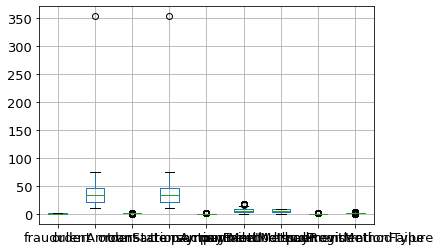

In [31]:
#create a boxplot for every column in df
boxplot = cust1.boxplot(grid=True, vert=True,fontsize=13)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

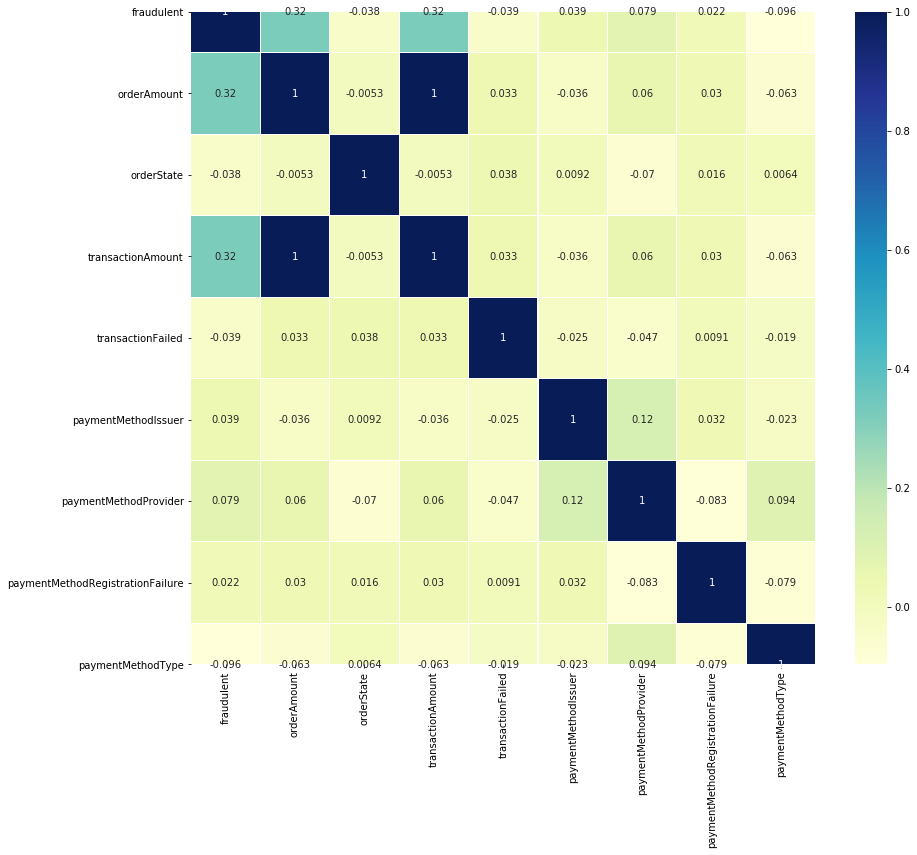

In [32]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(cust1.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

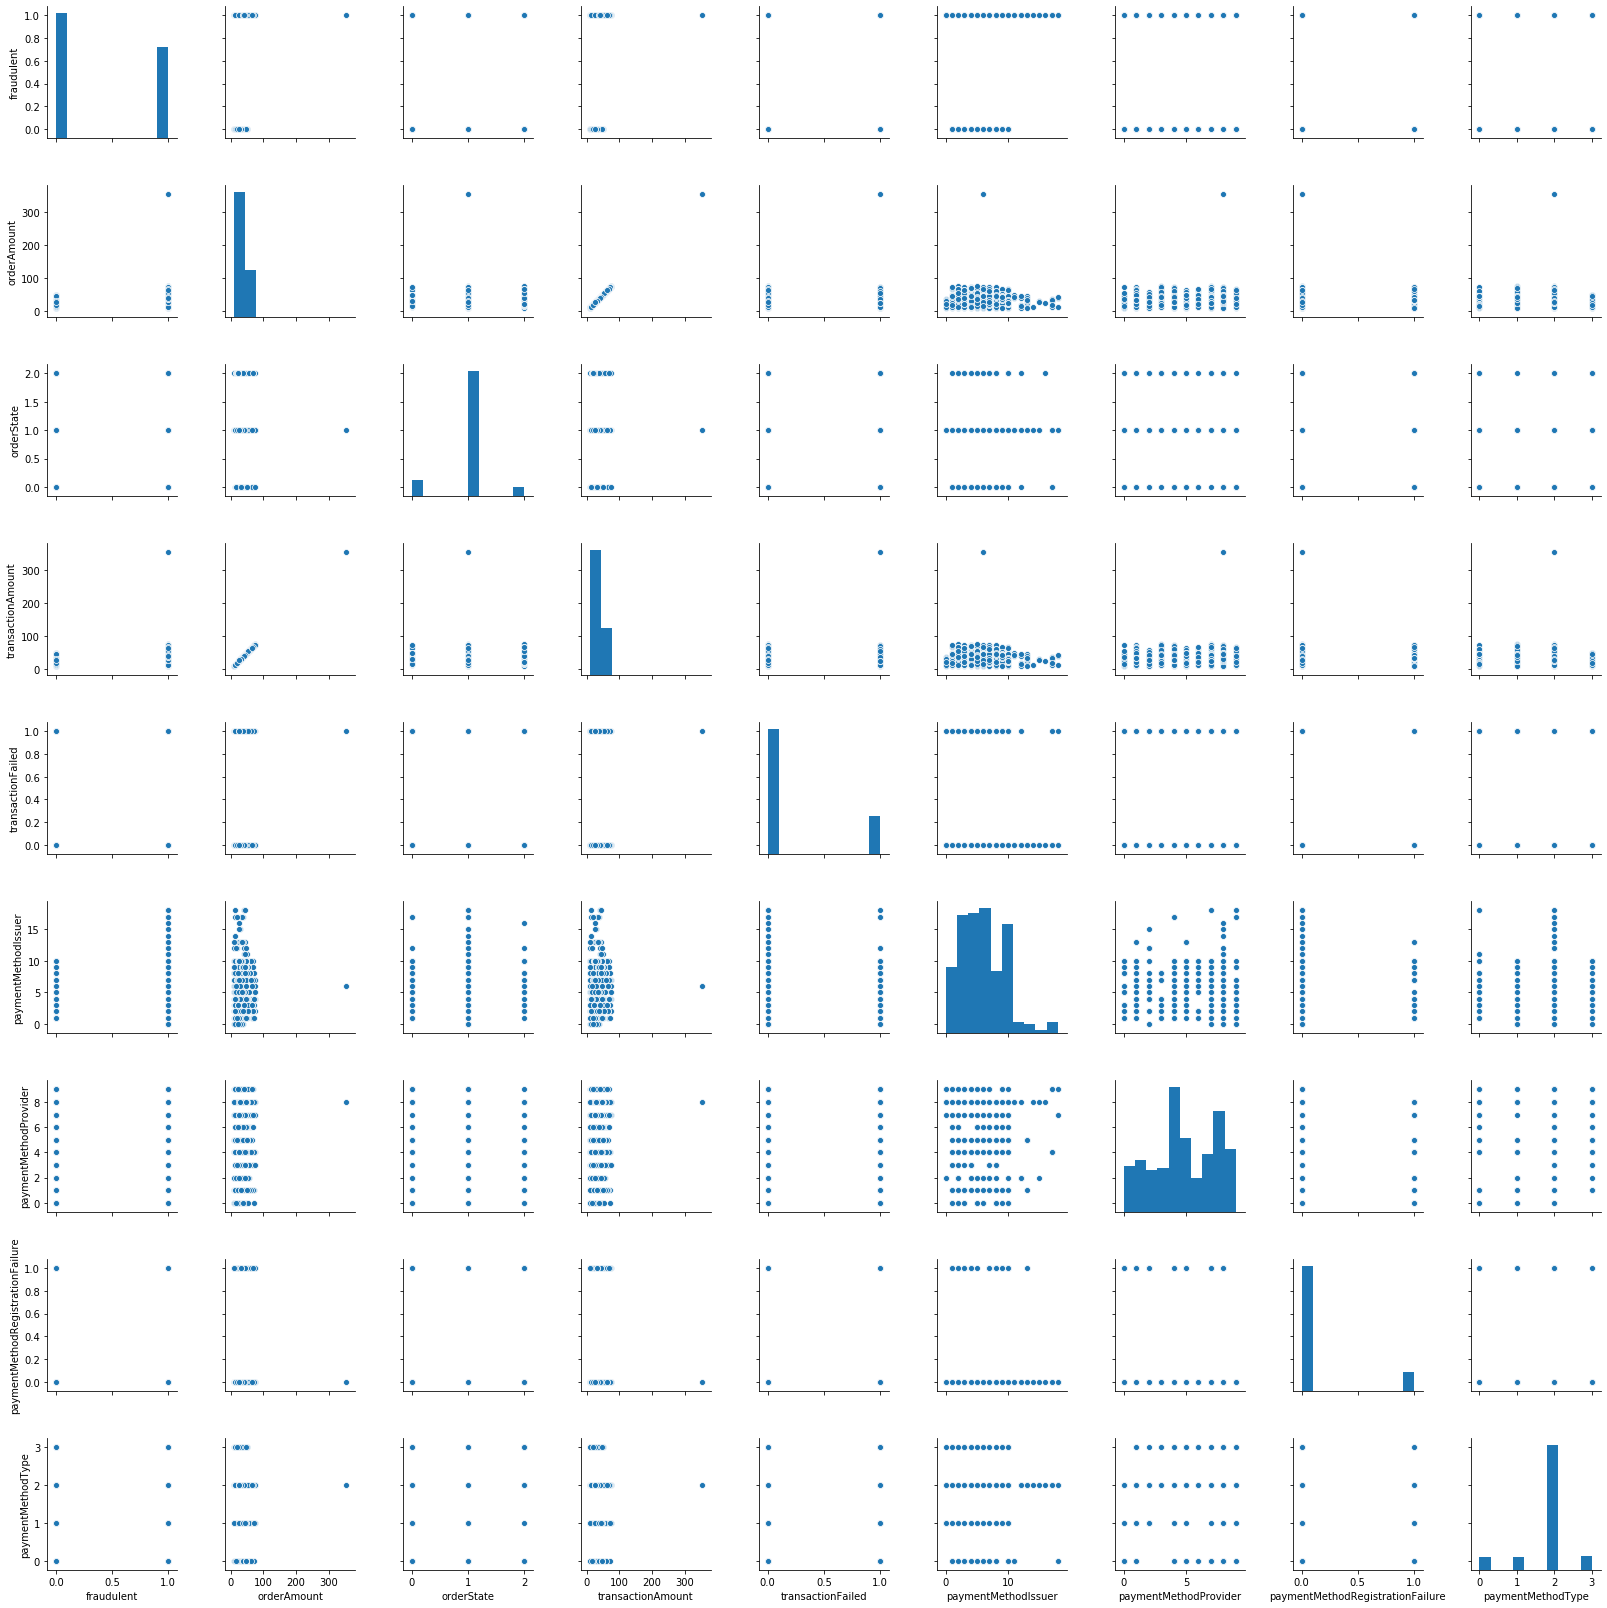

In [33]:
#pair plots
g = sns.pairplot(cust1)

C:\Users\Adarsh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


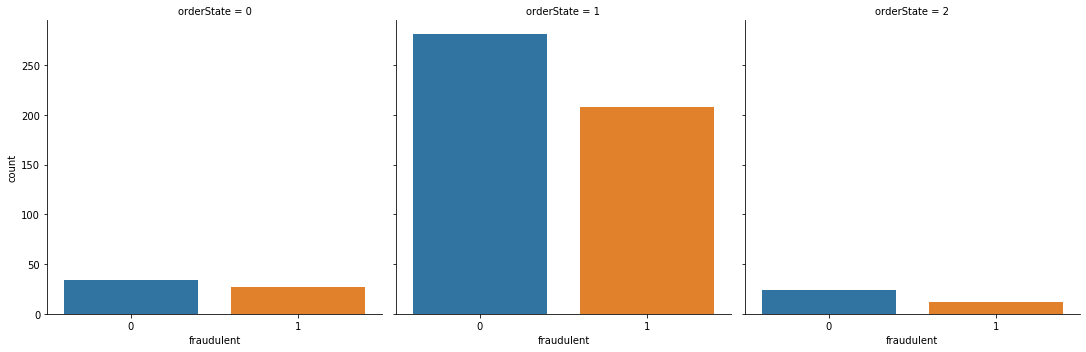

In [34]:
sb.factorplot(x='fraudulent' ,col='orderState' ,kind='count', data=cust1)

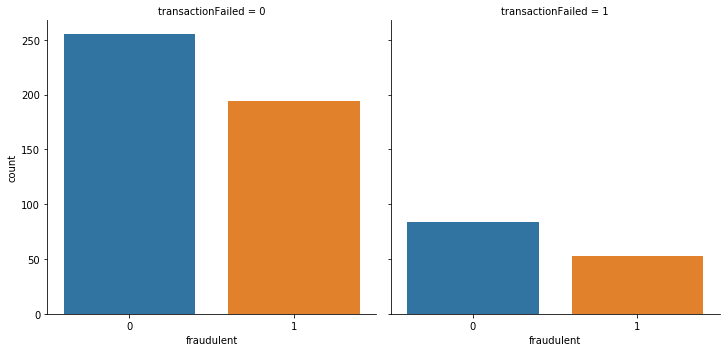

In [35]:
sb.factorplot(x='fraudulent' ,col='transactionFailed' ,kind='count', data=cust1)

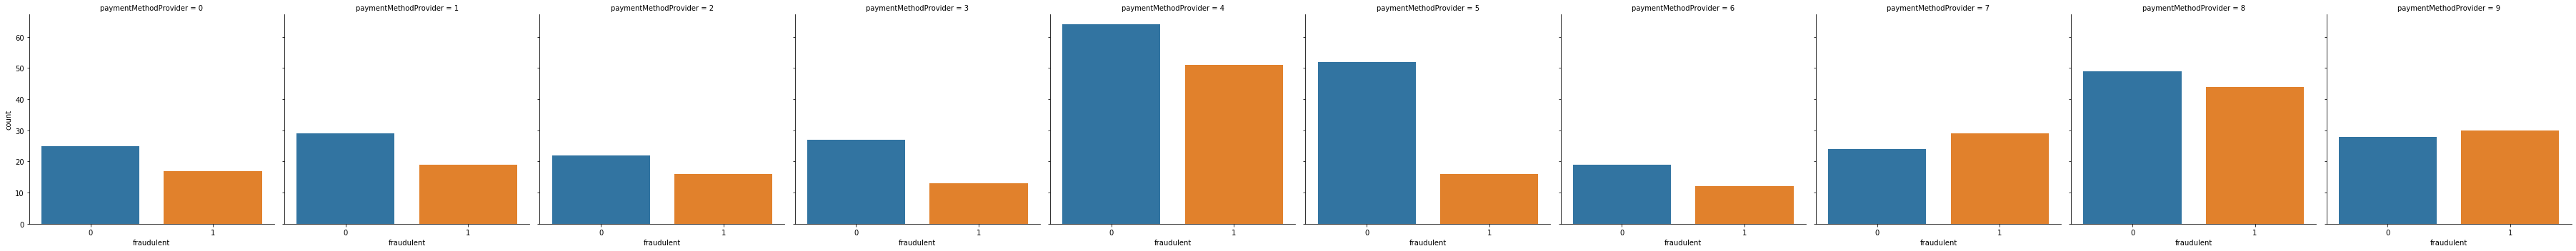

In [36]:
sb.factorplot(x='fraudulent' ,col='paymentMethodProvider' ,kind='count', data=cust1)

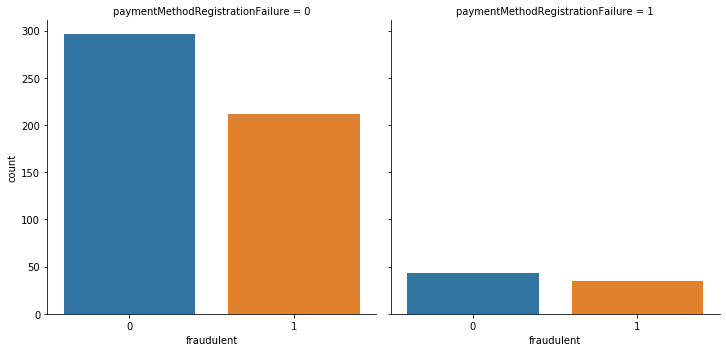

In [37]:
sb.factorplot(x='fraudulent' ,col='paymentMethodRegistrationFailure' ,kind='count', data=cust1)

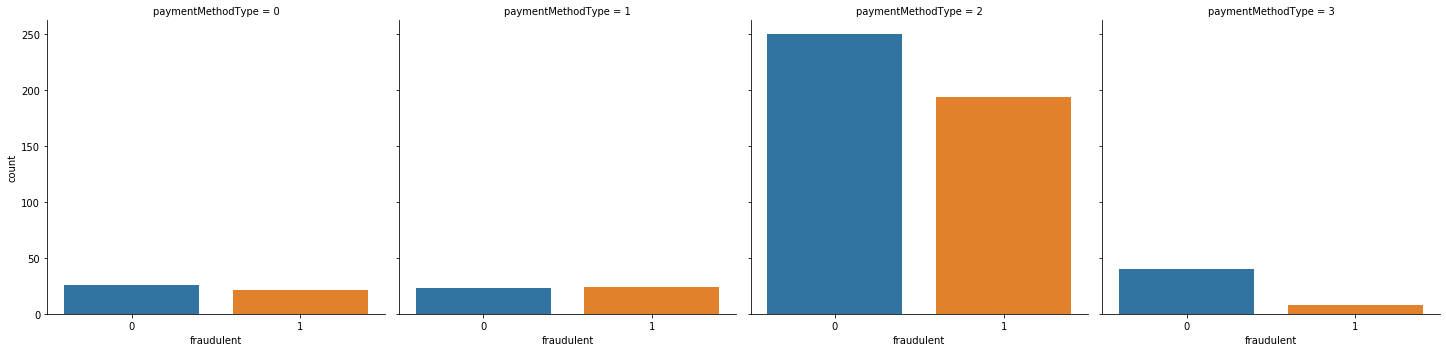

In [38]:
sb.factorplot(x='fraudulent' ,col='paymentMethodType' ,kind='count', data=cust1)

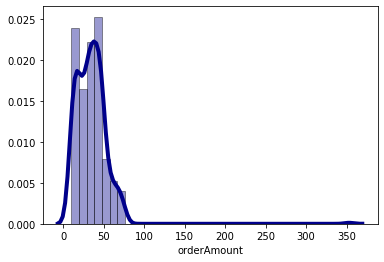

In [39]:
# Density Plot and Histogram of all arrival delays
sns.distplot(cust1['orderAmount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}) 

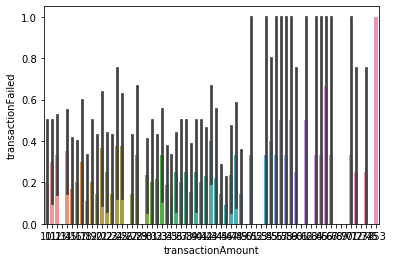

In [40]:
sns.barplot(x='transactionAmount',y='transactionFailed',data=cust1)

In [41]:
################## Standardization ##############

def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

df_norm = norm_func(cust1.iloc[:,1:])
df_norm.describe()

### New Dataset

cust2= pd.concat([df_norm, cust1.iloc[:,0]], axis = 1)

In [42]:
cust2

,orderAmount,orderState,transactionAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent
0,-0.819216,2.574759,-0.819216,-0.551907,-0.817025,-0.324097,2.549844,0.234369,0
1,-0.431249,0.105350,-0.431249,-0.551907,-0.817025,-0.324097,2.549844,0.234369,0
2,0.490173,0.105350,0.490173,-0.551907,-1.387336,-1.776647,-0.391512,-1.242410,1
3,-0.576737,0.105350,-0.576737,-0.551907,-1.387336,-1.776647,-0.391512,-1.242410,1
4,0.393181,0.105350,0.393181,1.808806,0.893910,1.128453,2.549844,-1.242410,1
...,...,...,...,...,...,...,...,...,...
618,-0.479745,0.105350,-0.479745,1.808806,1.179066,0.765315,-0.391512,0.234369,0
619,-0.479745,0.105350,-0.479745,1.808806,-1.387336,-0.687235,-0.391512,1.711149,0
620,-0.479745,0.105350,-0.479745,-0.551907,1.179066,0.765315,-0.391512,0.234369,0
621,-0.770720,0.105350,-0.770720,-0.551907,-1.387336,-0.687235,-0.391512,1.711149,0


In [43]:
#########################################
############## Balancing ############## : oversampling performing better than smote and undersampling
#########################################


# Separate input features and target
x = cust2.iloc[:,:8]
y = cust2.iloc[:,8]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=53)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.fraudulent==0]
fraud = X[X.fraudulent==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=53) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

result = upsampled.reset_index() 

######### Create New Dataframe 
r2=result.drop(["index"],axis=1)

# check new class counts
r2.fraudulent.value_counts()

1    205
0    205
Name: fraudulent, dtype: int64

In [44]:
r2

,orderAmount,orderState,transactionAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType,fraudulent
0,-0.043282,0.105350,-0.043282,-0.551907,0.038443,0.402178,-0.391512,0.234369,0
1,0.005214,2.574759,0.005214,-0.551907,0.323598,0.039040,2.549844,0.234369,0
2,0.587164,0.105350,0.587164,-0.551907,-0.531869,1.128453,2.549844,0.234369,0
3,-0.140274,0.105350,-0.140274,-0.551907,0.608754,-0.687235,-0.391512,0.234369,0
4,-0.043282,0.105350,-0.043282,-0.551907,-0.246713,1.491590,-0.391512,0.234369,0
...,...,...,...,...,...,...,...,...,...
405,0.053710,0.105350,0.053710,-0.551907,0.608754,0.765315,2.549844,0.234369,1
406,0.732652,0.105350,0.732652,-0.551907,-0.531869,-0.324097,-0.391512,0.234369,1
407,-0.188770,0.105350,-0.188770,-0.551907,2.034533,0.039040,2.549844,0.234369,1
408,0.975131,2.574759,0.975131,1.808806,-0.246713,-1.413509,-0.391512,0.234369,1


[0.15251938 0.0348501  0.2965742  0.0145428  0.24915714 0.1848648
 0.0181701  0.04932148]


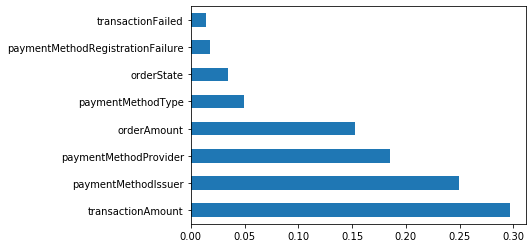

In [45]:

###################################################################
########################## Feature Selection ######################
###################################################################


#Feature Selection using Tree Classifier
a = r2.iloc[:,:8]  #independent columns
b = r2.iloc[:,-1]    #target column

model = ExtraTreeClassifier()
model.fit(a,b)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=a.columns)
feat_importances.nlargest(8).plot(kind='barh')

#Almost all 8 variables are contributing towards output variable.

In [46]:
###############################################################
####################### Cross Validation ######################
###############################################################


colnames = list(r2.columns)
predictors = colnames[:8]
target = colnames[8]

Xx = cust2[predictors]
Yy = cust2[target]

#Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=300, random_state=24)
all_accuracies = cross_val_score(classifier,Xx,Yy,cv=10)
print(all_accuracies)
print(all_accuracies.mean()) #70.28

#Catboost
modell = ctb.CatBoostClassifier()
all_accuraciess = cross_val_score(modell,Xx,Yy,cv=10)
print(all_accuraciess)
print(all_accuraciess.mean())#71.47


#Adaboost Classifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
all_accuraciesss = cross_val_score(abc,Xx,Yy,cv=10)
print(all_accuraciesss)
print(all_accuraciesss.mean())#75.75

#XGBClassifier
model = XGBClassifier()
all_accuracy = cross_val_score(model,Xx,Yy,cv=10)
print(all_accuracy)
print(all_accuracy.mean()) #71.13

#Adaboost classifier is giving highest accuracy so we will build final model on this algorithm.

[0.88135593 0.57627119 0.57627119 0.6779661  0.6779661  0.86440678
 0.77966102 0.65517241 0.63793103 0.70175439]
0.7028756139325519
Learning rate set to 0.013976
0:	learn: 0.6871687	total: 70.2ms	remaining: 1m 10s
1:	learn: 0.6821504	total: 71.2ms	remaining: 35.5s
2:	learn: 0.6752714	total: 72ms	remaining: 23.9s
3:	learn: 0.6685942	total: 72.8ms	remaining: 18.1s
4:	learn: 0.6625794	total: 73.7ms	remaining: 14.7s
5:	learn: 0.6581831	total: 74.6ms	remaining: 12.4s
6:	learn: 0.6539057	total: 75.9ms	remaining: 10.8s
7:	learn: 0.6489011	total: 76.8ms	remaining: 9.53s
8:	learn: 0.6444584	total: 77.6ms	remaining: 8.54s
9:	learn: 0.6385760	total: 78.4ms	remaining: 7.76s
10:	learn: 0.6345050	total: 79.3ms	remaining: 7.13s
11:	learn: 0.6295713	total: 80.1ms	remaining: 6.6s
12:	learn: 0.6248678	total: 81ms	remaining: 6.15s
13:	learn: 0.6208804	total: 82ms	remaining: 5.78s
14:	learn: 0.6175419	total: 83ms	remaining: 5.45s
15:	learn: 0.6137864	total: 83.8ms	remaining: 5.16s
16:	learn: 0.6100475	tot

In [47]:
#############################################################################
############################## Final Model  Bulding #########################
#############################################################################


#Adaboost classifier


X = r2[predictors]
Y = r2[target]

#Train Test split
train,test = train_test_split(r2,test_size = 0.4,stratify=r2.fraudulent,random_state=53)

In [48]:
train.shape

(246, 9)

In [49]:
test.shape

(164, 9)

In [50]:
###### Model building ######
rf =AdaBoostClassifier(n_estimators=50,learning_rate=0.1)

rf.fit(train[predictors],train[target])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=None)

In [51]:
rf.estimators_ # 

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=507061656, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1531845373, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                        max_features=None, max_leaf_nodes=None,
                        min_impur

In [52]:
rf.classes_ # class labels (output)

array([0, 1], dtype=int64)

In [53]:
rf.predict(X)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [54]:
pred_train=rf.predict(train[predictors])

In [55]:
pred_train

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [56]:
pred_test = rf.predict(test[predictors])

In [57]:
pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [58]:
pd.Series(pred_test).value_counts()

0    116
1     48
dtype: int64

In [59]:
pd.crosstab(test[target],pred_test)

col_0,0,1
fraudulent,,
0,78,4
1,38,44


In [60]:
pd.crosstab(train[target],pred_train)

col_0,0,1
fraudulent,,
0,116,7
1,48,75


In [61]:
#f1 Score 
f1_score(test[target], pred_test)#67.69

0.676923076923077

In [62]:
#recall
recall_score(test[target], pred_test, average='weighted') 


0.7439024390243902

In [63]:
#precision
precision_score(test[target], pred_test, average='weighted')

0.7945402298850575

In [64]:
# Accuracy = train
np.mean(train.fraudulent == rf.predict(train[predictors]))

0.7764227642276422

In [65]:
# Accuracy = Test
np.mean(pred_test==test.fraudulent)

0.7439024390243902

In [ ]:
#just Good model.